https://wikidocs.net/50739

In [1]:
# 오늘 자연어 및 이론
# 내일 욜로
# 다음주도 자연어
# 다음주 말쯤에는 취업처 확인

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1e6c6302a40>)

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

In [4]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [11]:
# parse_text  렉 걸릴 정도로 텍스트가 방대하므로 가급적이면 시도하지 않는 게 좋을듯

In [5]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [6]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

In [7]:
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

In [8]:
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [12]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [ ]:
# window라는 것이 주변 단어를 보는 크기를 지칭하는데 이 값이 2라면
# 중심단어가 3번째 리스트의 can이라면, but it can be too 이렇게 구성된다고 볼 수 있음

In [13]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
# vector_size = 워드 벡터의 특징 값 = 임베딩 된 벡터 차원.(크면 오래 걸리고 공간을 많이 차지함)
# window = 컨텍스트 윈도우 크기(이게 중요함. 적당한 사이즈를 조절해야됨)
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않음)
# workers = 학습을 위한 프로세스 수(cpu의 프로세서 수를 설정)
# sg = 0은 CBOW, 1은 Skip-gram.
# 여기서 잘 설정해야될 것들은 vector_size, window, min_count 3가지임. 나머지는 기본값으로 설정해도 무관함

In [19]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8515523076057434), ('guy', 0.8208038806915283), ('lady', 0.8011896014213562), ('boy', 0.7843905687332153), ('girl', 0.7639279365539551), ('gentleman', 0.7557947039604187), ('soldier', 0.7498794794082642), ('kid', 0.7130084037780762), ('poet', 0.6749656200408936), ('son', 0.6712668538093567)]


In [ ]:
# man에 대해 임베딩 벡터가 생성되는데 함께 자주 등장하는 단어들이 model result에 출력됐다고 볼 수 있음
# 근데 왜 woman이 나오고 guy가 나왔을지는 명확하게는 모름. 예측만 하는 것일뿐임(강사님 설명)

In [20]:
model_result = model.wv.most_similar("sky")
print(model_result) # 여기서는 sun, sea, window, lake 등 날씨 및 물과 관련된 단어가 많이 나옴

[('sun', 0.7858054041862488), ('sea', 0.7359716296195984), ('window', 0.7218830585479736), ('lake', 0.7191657423973083), ('ocean', 0.7073063850402832), ('river', 0.7052646279335022), ('mountain', 0.6999973058700562), ('sand', 0.6993535161018372), ('clouds', 0.6925384402275085), ('orbit', 0.6892330050468445)]


In [23]:
print(model.wv.vectors.shape) # 21613개의 단어
model.wv.vectors[0] # 해당 단어의 벡터 좌표

(21613, 100)


array([-7.2992301e-01, -1.0725627e+00, -6.2677824e-01, -5.7042050e-01,
       -1.0220820e+00, -1.4912241e+00,  3.8249457e-01, -2.6603657e-01,
        9.6965587e-01,  6.4507651e-01,  1.4805424e+00, -4.1052741e-01,
       -9.0465337e-01,  8.1417871e-01, -2.0088343e-01,  1.2532982e-01,
       -6.6896832e-01,  6.1523920e-01, -2.3502152e+00, -5.3408158e-01,
        9.2245191e-01,  4.8133302e-01,  4.0332014e-03, -6.9829434e-01,
        4.2691264e-01, -2.6732848e+00,  8.9020711e-01,  6.8643421e-01,
        6.4802271e-01,  6.3019973e-01,  1.3736260e-01, -7.5453085e-01,
        6.6118342e-01, -9.8640281e-01,  7.3737144e-01,  3.1039196e-01,
       -9.9711913e-01, -1.3057377e+00,  1.5925653e-01,  5.5658124e-02,
       -5.4070187e-01, -6.8734646e-01, -1.8434658e+00, -2.1997094e+00,
        5.8702074e-02,  4.8134899e-01, -1.1334875e+00,  1.4002587e+00,
        7.6972902e-01, -1.7235252e-03, -6.4669192e-01,  8.5188067e-01,
       -7.5916812e-02, -6.3618787e-02, -1.1845347e+00,  5.0753200e-01,
      

In [24]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [26]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x1e71f6a8460>)

In [27]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [28]:
train_data.shape

(200000, 3)

In [32]:
train_data.isnull().sum() # 빈값 확인
print(train_data.isnull().values.any())

True


In [33]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [34]:
train_data.shape

(199992, 3)

In [35]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) 이제 이렇게 해야되는듯함

C:\Users\fkfma\AppData\Local\Temp\ipykernel_26900\2342004949.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [36]:
train_data # 코랩에서 진행한 경우는 숫자가 남아있는 현상이 있는 듯함

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰레기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [38]:
from tqdm import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 199992/199992 [10:50<00:00, 307.29it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


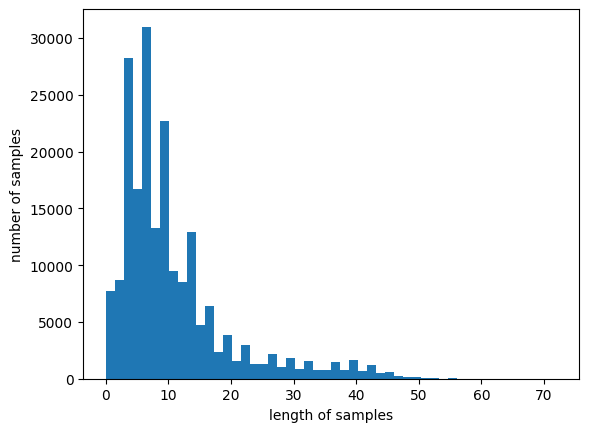

In [39]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [43]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
# urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                        #    filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)


In [ ]:
# 현재 위 아마존 주소는 작동하지 않음
# 이에 따라 다른 주소에 있는 파일을 다운로하여 작업 진행

In [44]:
print(word2vec_model.vectors.shape) # 300만개의 단어 및 단어당 300차원

(3000000, 300)


In [45]:
print(word2vec_model.similarity('this', 'is')) # cos similarity를 반환
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [47]:
type(word2vec_model)

gensim.models.keyedvectors.KeyedVectors

In [48]:
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [49]:
model.wv.most_similar("electrofishing") # 에러를 띄움


KeyError: "Key 'electrofishing' not present in vocabulary"

# 패스트텍스트

In [ ]:
# n-gram에서 n=3인경우
# <ap, app, ppl, ple, le>, <apple>
# 위에서 일반 토큰이 ap부터 le까지 총 5개의 토큰들이고 apple은 특별 토큰임
# 벡터의 덧셈을 찾아볼것
# 모르는 단어(Out Of Vocabulary)가 들어오면 에러를 띄움. 
# 다만 단어가 birthplace라는 단어가 없지만 birth, place가 있다면 fasttext는 birthplace의 벡터를 얻을 수 있음
# 이는 word2vec과 GloVe는 OOV에 대처할 수 없는 점과 다름

In [51]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)


In [52]:
model.wv.most_similar("electrofishing")


[('electrolux', 0.8695796132087708),
 ('electrolyte', 0.8611542582511902),
 ('electroshock', 0.8506017327308655),
 ('electro', 0.8462629318237305),
 ('electroencephalogram', 0.8382812738418579),
 ('electrochemical', 0.8283643126487732),
 ('electrogram', 0.8192813992500305),
 ('electrons', 0.814728856086731),
 ('electron', 0.81429123878479),
 ('electromagnet', 0.8127646446228027)]

In [53]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh # git bash로 실행할 것

c:\Users\fkfma\Desktop\국비교육-AI웹서비스\TIL\ds\Mecab-ko-for-Google-Colab


Cloning into 'Mecab-ko-for-Google-Colab'...
'bash'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [54]:
# 한글 자모 단위 처리 패키지 설치
pip install hgtk

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: C0D5-B7CC

 c:\Users\fkfma\Desktop\������-AI������\TIL\ds\Mecab-ko-for-Google-Colab ���͸�

2024-07-11  ���� 11:26    <DIR>          .
2024-07-11  ���� 11:26    <DIR>          ..
2024-07-11  ���� 11:26                11 .gitignore
2024-07-11  ���� 11:26    <DIR>          images
2024-07-11  ���� 11:26             2,646 install_mecab-ko_on_colab_light_220429.sh
2024-07-11  ���� 11:26             2,481 install_mecab-ko_on_colab190912.sh
2024-07-11  ���� 11:26            11,558 LICENSE
2024-07-11  ���� 11:26             2,496 README.md
               5�� ����              19,192 ����Ʈ
               3�� ���͸�  194,531,274,752 ����Ʈ ����


In [55]:
# 자모 단위 한국어는 교재 참고..

In [ ]:
# Doc2Vec도 교재 참고하여 해볼 필요 있음